**420-A52-SF - Algorithmes d'apprentissage supervisé - Automne 2022 - Spécialisation technique en Intelligence Artificielle**<br/>
MIT License - Copyright (c) 2022 Mikaël Swawola
<br/>
![Travaux Pratiques - Équation normale et régression polynomiale](static/04-A1-banner.png)
<br/>
**Objectif:** cette séance de travaux pratique a pour objectif la résolution des paramètres optimaux d'une régression linéaire à l'aide de l'**équation normale**. La régression sera de type polynomiale et le jeu de données utilisé sera la version simplifiée (une seule variable) du jeu de données *Advertising*

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

### 0 - Chargement des bibliothèques

In [2]:
# Manipulation de données
import numpy as np
import pandas as pd

# Visualisation de données
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Configuration de la visualisation
sns.set(style="darkgrid", rc={'figure.figsize':(11.7,8.27)})

### 1 - Lecture du jeu de données advertising (avec une seule variable)

**Exercice 1-1**: à l'aide de la bibiothèques *pandas*, lire le fichier `advertising-univariate.csv`

In [4]:
# Compléter le code ci-dessous ~ 1 ligne
df = pd.read_csv('../../data/advertising-univariate.csv', usecols=['TV','sales'])

**Exercice 1-2**: à l'aide de la fonction `head()`, visualiser les premières lignes de la trame de données.

In [5]:
# Compléter le code ci-dessous ~ 1 ligne
df.head()

,TV,sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


### 2 - Préparation de la structure de données (matrice des prédicteurs)

**Exercice 2**: Construire la matrice des prédicteurs X (Design matrix). Ajouter des variables explicatives polynomiales telles que l'hypothèse soit de la forme<br/><br/>
$h_{\theta}(x)=\theta_{0} + \theta_{1}x + \theta_{1}x^2 + \theta_{3}x^3$

In [6]:
# Compléter le code ci-dessous ~ 5 lignes
x0 = np.ones(shape=(200))
x1 = df['TV'].values
x2 = x1**2
x3 = x1**3 
X = np.array([x0,x1,x2,x3])

y = df['sales'].values

<strong style='color: green'>TEST - Le code ci-dessous vous permet de tester la forme de `X`. Le `assert` ne doit pas renvoyer d'exception</strong>

In [7]:
assert X.shape == (4,200)

### 3 - Définition du modèle

**Exercice 3**: compléter la fonction ci-dessous représentant le modèle de régression polynomiale

Pour rappel, l'hypothèse utilisée ici est:

$h_{\theta}(x)=\theta_{0} + \theta_{1}x + \theta_{1}x^2 + \theta_{3}x^3$

In [8]:
def hypothesis(X, theta):
    assert X.shape[0] == theta.shape[0] # Vérifie que la multiplication va être possible (n x m) x (m x o) => (x x o) 
    # Compléter le code ci-dessous ~ 1 ligne
    h = np.dot(theta.T, X)
    return h

<strong style='color: green'>TEST - Le code ci-dessous vous permet de tester votre fonction `hypothesis`. Le `assert` ne doit pas renvoyer d'exception</strong>

In [2]:
X_test = np.array([[1,1],[3,4],[2,2],[1,-1]])
theta_test = np.array([1,2,2,4]).reshape(-1,1)
hypothesis(X_test, theta_test
assert np.array_equal(hypothesis(X_test,theta_test), np.array([[15,9]]))

SyntaxError: '(' was never closed (1459662149.py, line 3)

### 4 - Équation normale

**Exercice 4**: Compléter l'équation normale ci-dessous. Pour rappel, celle-ci s'exprime sous la forme:

$
\theta=(X^TX)^{-1}X^Ty
$


In [10]:
# Compléter le code ci-dessous ~ 1 ligne
theta = np.dot(np.dot(np.linalg.inv(np.dot(X,X.T)),X),y)
        
print(f'Theta = {theta}')

Theta = [ 5.42010655e+00  9.64341770e-02 -3.15222433e-04  5.57199796e-07]


La valeur de $\theta_j$ devrait être

```Theta = [ 5.42010655e+00  9.64341770e-02 -3.15222433e-04  5.57199796e-07]```

### 5 - Affichage du modèle

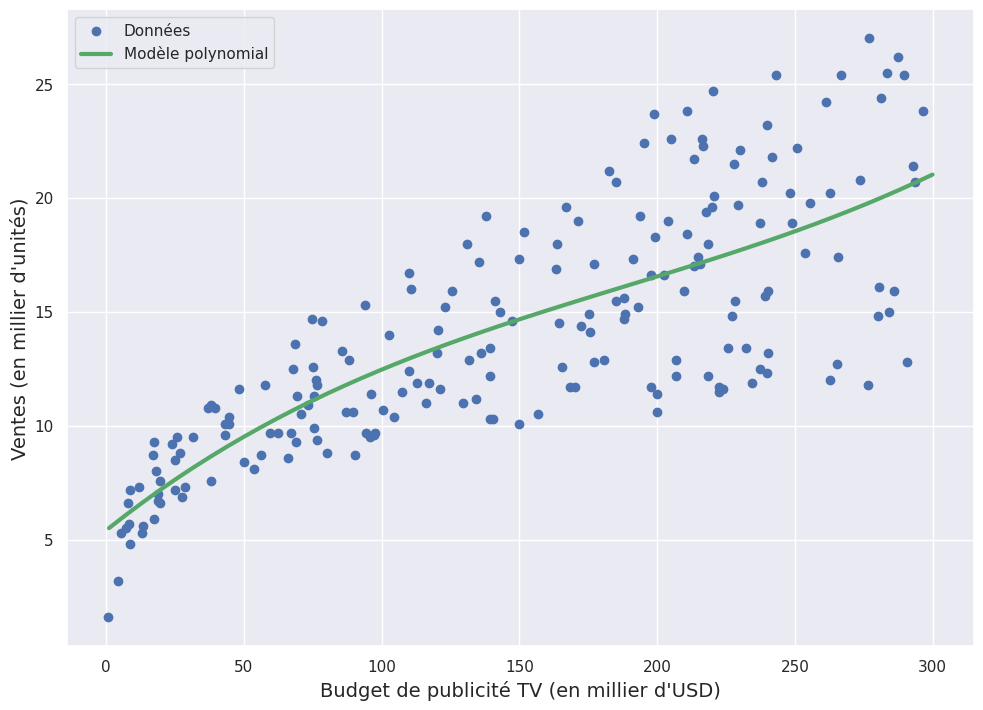

In [11]:
reg_x = np.linspace(1,300,50)
reg_X = np.array((np.ones((50)), reg_x, reg_x**2, reg_x**3))
reg_y = hypothesis(reg_X, theta)
fig, ax = plt.subplots()
ax.scatter(x1,y, label="Données")
ax.plot(reg_x, reg_y, color="g", lw=3, label="Modèle polynomial")
ax.set_xlabel("Budget de publicité TV (en millier d'USD)", fontsize=14)
ax.set_ylabel("Ventes (en millier d'unités)", fontsize=14)
ax.legend(loc='upper left')

### Fin du TP